# Definição do novo *dataset*

O *dataset utilizado será o "TOWARDS LIMB POSITION INVARIANT MYOELECTRIC PATTERN RECOGNITION USING TIME-DEPENDENT SPECTRAL FEATURES" \[1\]. Maiores informações podem ser vistas no site: https://www.rami-khushaba.com/electromyogram-emg-repository.html

De acordo com a figura seguinte, neste dataset existem 5 posições e 8 movimentos. Algumas questões de projetos foram levadas em consideração:

1. A primeira posição (P1) possui 40.000 samples e todas as outras possuem 20.000 samples. Desta forma, a posição 1 foi excluída do experimento de teste;
2. Cada posição possui 5 tentativas. Desta forma, será utilizada todas as tentativas do mesmo movimento como uma soma total de samples (todas as tentativas serão concatenadas);
3. Como este experimento resultará em 4 posições e 8 movimentos, será considerado primeiramente um experimento com 32 classes (4 * 8) e um segundo experimento com 8 classes (somando/dispresando as posições do braço).

\[1\] R. N. Khushaba, Maen Takruri, Jaime Valls Miro, and Sarath Kodagoda, "Towards limb position invariant myoelectric pattern recognition using time-dependent spectral features", Neural Networks, vol. 55, pp. 42-58, 2014. https://doi.org/10.1016/j.neunet.2014.03.010

### Separação das classes

In [1]:
from glob import glob

# exclusão dos arquivos com "Pos1" no nome
arquivos = glob("lib/data/dt2/Pos[2-5]*.txt")
# índices para as 32 classes considerando as posições de 2 à 5
cl32 = {
    "Pos2_HandOpen": list(), "Pos3_HandOpen": list(), "Pos4_HandOpen": list(), "Pos5_HandOpen": list(),
    "Pos2_HandRest": list(), "Pos3_HandRest": list(), "Pos4_HandRest": list(), "Pos5_HandRest": list(),
    "Pos2_ObjectGrip": list(), "Pos3_ObjectGrip": list(), "Pos4_ObjectGrip": list(), "Pos5_ObjectGrip": list(),
    "Pos2_PichGrip": list(), "Pos3_PichGrip": list(), "Pos4_PichGrip": list(), "Pos5_PichGrip": list(),
    "Pos2_WristExten": list(), "Pos3_WristExten": list(), "Pos4_WristExten": list(), "Pos5_WristExten": list(),
    "Pos2_WristFlex": list(), "Pos3_WristFlex": list(), "Pos4_WristFlex": list(), "Pos5_WristFlex": list(),
    "Pos2_WristPron": list(), "Pos3_WristPron": list(), "Pos4_WristPron": list(), "Pos5_WristPron": list(),
    "Pos2_WristSupi": list(), "Pos3_WristSupi": list(), "Pos4_WristSupi": list(), "Pos5_WristSupi": list(),
}
# índices para as 8 classes desconsiderando as posições de 2 à 5
cl08 = {
    "HandOpen": list(),
    "HandRest": list(),
    "ObjectGrip": list(),
    "PichGrip": list(),
    "WristExten": list(),
    "WristFlex": list(),
    "WristPron": list(),
    "WristSupi": list(),
}

### Carregando o *dataset*

Neste trecho de código, todos as amostras serão dividas entre os conjuntos de calsses específicas

In [2]:
import re

for arquivo in arquivos:
    trial_file = open(arquivo)
    nome = trial_file.name.split('/')[-1].split('.')[0]
    trial = list()
    for linha in trial_file.readlines():
        # foi necessário substituir os números "int" por "float"
        linha = re.sub(r"(?<=\ )(\d)(?=\ )", r"\1.0", linha)
        # casamento da linha com 7 pontos (1 para cada eletrodo)
        sample = [float(s) for s in re.findall(r"\-?\d\.\d+", linha)]
        trial.append(sample)
    cl08["{}".format(nome[5:-3])].append(trial)
    cl32["Pos{}{}".format(nome[3], nome[4:-3])].append(trial)

Agora será realizado a divisão dos dados e suas respectivas classes em sequência, formando dados em numpy.array para X1 (dados EMG das 8 classes), y1 (labels das 8 classes), X2 (dados EMG das 32 classes), y2 (labels das 32 classes)

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X1 = np.array(list(cl08.values()))
X2 = np.array(list(cl32.values()))
# transformando labels categóricos em numéricos
le = LabelEncoder()
y1 = np.array(le.fit_transform(list(cl08.keys())))
y2 = np.array(le.fit_transform(list(cl32.keys())))
# shape: [8 classes, 24 trials, 20000 samples, 7 eletrodos]
print(X1.shape)
# shape: [32 classes, 6 trials, 20000 samples, 7 eletrodos]
print(X2.shape)
print(y1)
print(y2)

(8, 24, 20000, 7)
(32, 6, 20000, 7)
[0 1 2 3 4 5 6 7]
[ 0  8 16 24  1  9 17 25  2 10 18 26  3 11 19 27  4 12 20 28  5 13 21 29
  6 14 22 30  7 15 23 31]


**Desafio 1:** Realizar mudanças neste dataset para facilitar a opção de trabalhar com as 32 classes

# Acrescentando códigos faltantes...


**Desafio 2:** Realize abaixo, a inserção dos códigos de (1) pré-processamento, (2) extração e seleção de características e (3) normalizações.

In [5]:
# Inserir código faltante aqui!

## Aplicando *Multilayer Perceptron*

Está demonstrado neste ponto a execução de um Multilayer Perceptron (MLP) utilizando o framework para construção e execução de Redes Neurais Artificias (RNN) Keras.

Vamos iniciar mostrando como carregar uma base de dados da UCI e utilizar o classificador ID3 obtido por meio scikit learn. A base de dados é a Car Evaluation Data Set (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

O dataset possui os seguintes atributos:

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.
E as seguintes classes: unacc, acc, good, vgood

### Definição de todas as bibliotecas

In [11]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib.request import urlopen, urlretrieve

import matplotlib.pyplot as plt
%matplotlib inline

### Código para o carregamento da base de dados

Após o carregamento dos dados, é utilizado a função LabelEncoder para transformar os dados de categóricos para numéricos.

In [12]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
urlretrieve(url, 'car.txt')
filedata = open('car.txt')
data = filedata.read()
dataset = np.array([s.split(',') for s in data.split('\n')][:-1])
print(dataset)
print(len(dataset))
print(dataset.shape)

# Transformação dos valores de categórico para numérico
le = LabelEncoder()
features = np.array([le.fit_transform(f) for f in dataset[:, :-1].T]).T

# obtendo a coluna com as respostas
labels = le.fit_transform(dataset[:, -1])
categorical_labels = to_categorical(labels, num_classes=len(set(labels)))

[['vhigh' 'vhigh' '2' ... 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'high' 'unacc']
 ...
 ['low' 'low' '5more' ... 'big' 'low' 'unacc']
 ['low' 'low' '5more' ... 'big' 'med' 'good']
 ['low' 'low' '5more' ... 'big' 'high' 'vgood']]
1728
(1728, 7)


### Desenvolvimento da função para plotar os custos e as acurácias:

In [13]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

### Divisão dos dados em treino e teste:

In [14]:
# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    features, categorical_labels, test_size=0.3)

# treino: 80% dos 80% de treino. teste: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=True)

### Aplicação do algoritmo de MLP e geração dos resultados:

/home/rhubner/Dropbox/UTFPR/aulas/RP36O/repo/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/150
57/57 [==============================] - 5s 5ms/step - loss: 1.6235 - accuracy: 0.3644 - val_loss: 1.0303 - val_accuracy: 0.6887
Epoch 2/150
57/57 [==============================] - 0s 871us/step - loss: 1.0117 - accuracy: 0.6621 - val_loss: 0.8800 - val_accuracy: 0.6915
Epoch 3/150
57/57 [==============================] - 0s 806us/step - loss: 0.8652 - accuracy: 0.7063 - val_loss: 0.8001 - val_accuracy: 0.6970
Epoch 4/150
57/57 [==============================] - 0s 916us/step - loss: 0.7731 - accuracy: 0.7292 - val_loss: 0.7682 - val_accuracy: 0.7245
Epoch 5/150
57/57 [==============================] - 0s 822us/step - loss: 0.6821 - accuracy: 0.7784 - val_loss: 0.7142 - val_accuracy: 0.7796
Epoch 6/150
57/57 [==============================] - 0s 824us/step - loss: 0.7132 - accuracy: 0.7702 - val_loss: 0.6712 - val_accuracy: 0.7713
Epoch 7/150
57/57 [==============================] - 0s 976us/step - loss: 0.5961 - accuracy: 0.7955 - val_loss: 0.6652 - val_accuracy: 0.7548
E

57/57 [==============================] - 0s 908us/step - loss: 0.3202 - accuracy: 0.9475 - val_loss: 0.3653 - val_accuracy: 0.9229
Epoch 59/150
57/57 [==============================] - 0s 958us/step - loss: 0.3311 - accuracy: 0.9333 - val_loss: 0.4215 - val_accuracy: 0.8788
Epoch 60/150
57/57 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.9172 - val_loss: 0.3801 - val_accuracy: 0.9091
Epoch 61/150
57/57 [==============================] - 0s 983us/step - loss: 0.3400 - accuracy: 0.9409 - val_loss: 0.3883 - val_accuracy: 0.8733
Epoch 62/150
57/57 [==============================] - 0s 944us/step - loss: 0.3620 - accuracy: 0.9141 - val_loss: 0.3624 - val_accuracy: 0.9229
Epoch 63/150
57/57 [==============================] - 0s 866us/step - loss: 0.3317 - accuracy: 0.9389 - val_loss: 0.4243 - val_accuracy: 0.8733
Epoch 64/150
57/57 [==============================] - 0s 855us/step - loss: 0.3457 - accuracy: 0.9224 - val_loss: 0.3562 - val_accuracy: 0.9256
Epoch 6

Epoch 115/150
57/57 [==============================] - 0s 945us/step - loss: 0.2798 - accuracy: 0.9576 - val_loss: 0.2860 - val_accuracy: 0.9394
Epoch 116/150
57/57 [==============================] - 0s 969us/step - loss: 0.2649 - accuracy: 0.9623 - val_loss: 0.2880 - val_accuracy: 0.9504
Epoch 117/150
57/57 [==============================] - 0s 891us/step - loss: 0.3272 - accuracy: 0.9115 - val_loss: 0.3256 - val_accuracy: 0.9063
Epoch 118/150
57/57 [==============================] - 0s 872us/step - loss: 0.2711 - accuracy: 0.9557 - val_loss: 0.3103 - val_accuracy: 0.9256
Epoch 119/150
57/57 [==============================] - 0s 990us/step - loss: 0.2604 - accuracy: 0.9634 - val_loss: 0.3027 - val_accuracy: 0.9477
Epoch 120/150
57/57 [==============================] - 0s 977us/step - loss: 0.2784 - accuracy: 0.9578 - val_loss: 0.3338 - val_accuracy: 0.9036
Epoch 121/150
57/57 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.9603 - val_loss: 0.3528 - val_accu

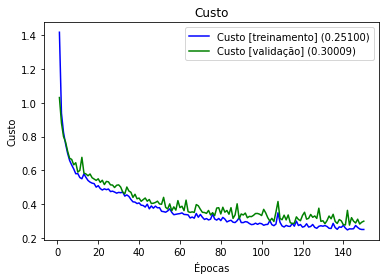

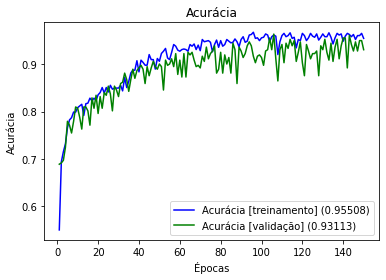

/home/rhubner/Dropbox/UTFPR/aulas/RP36O/repo/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Acurácia: 93.26%
Matriz de confusão:
[[106   4   2   2]
 [  1  15   0   4]
 [ 22   0 351   0]
 [  0   0   0  12]]

              precision    recall  f1-score   support

           0    0.82171   0.92982   0.87243       114
           1    0.78947   0.75000   0.76923        20
           2    0.99433   0.94102   0.96694       373
           3    0.66667   1.00000   0.80000        12

    accuracy                        0.93256       519
   macro avg    0.81805   0.90521   0.85215       519
weighted avg    0.94095   0.93256   0.93470       519



In [15]:
# definição de uma fração do regularizador
l = 0.01

# desenvolvimento do modelo Keras para uma MLP
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=6,
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Aplicação de um modelo de descida de gradiente utilizando o Stocastic Gradient Descendent (SGD)
sgd = SGD(lr=0.05, momentum=0.0)
# Função de otimização da rede: ADAM
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)
# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=15,
                    validation_data=(X_val, y_val))
plot_history(history)
score = model.predict_classes(X_test)
y_true = [np.where(x == 1)[0][0] for x in y_test]
print('Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100))
print('Matriz de confusão:')
print(confusion_matrix(y_true, score))
print()
print(classification_report(y_true, score, digits=5))

**Desafio 3:** Encaixar o classificador MLP no primeiro *dataset* apresentado.